<a href="https://colab.research.google.com/github/specialink/Prueba/blob/main/Hawaii_Oahu_Honolulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb Data Analysis - Hawaii**

Hawai es un estado de los Estados Unidos de América. Es el único estado situado en el Océano Pacífico y el único compuesto en su totalidad por islas.

La diversidad de sus paisajes naturales, su clima tropical cálido, la abundancia de playas públicas, su entorno oceánico y sus volcanes activos lo convierten en un destino popular para turistas, surfistas, biólogos y vulcanólogos. Debido a su ubicación central en el Pacífico y a la migración laboral del siglo XIX, la cultura hawaiana está fuertemente influenciada por las culturas norteamericana y asiática oriental, además de su cultura autóctona hawaiana.

Airbnb ya está considerada como la mayor empresa hotelera de la actualidad. El detalle es: ¡no tiene ningún hotel!

Conectando a personas de todo el mundo que quieren viajar con anfitriones que quieren alquilar sus propiedades de forma práctica y sencilla, Airbnb proporciona una plataforma innovadora para realizar esta alternativa de alojamiento.

A finales de 2018, la Startup fundada hace 10 años, ya había alojado a más de 300 millones de personas en todo el mundo, desplazando a las cadenas hoteleras tradicionales.

Una de las iniciativas de Airbnb es ofrecer datos en la web de algunas de las principales ciudades del mundo. A través de la página web Inside Airbnb, es posible descargar una gran cantidad de datos para desarrollar proyectos y soluciones de Data Science.

In [7]:
#importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Obtención de los datos

Todos los datos utilizados aquí, fueron extraidos de Inside Airbnb Para el análisis inicial exploratorio, sólo descargará el archivo:

listings.csv - Información resumida y métricas para listings en Hawaii

In [45]:
df = pd.read_csv("/listings (1).csv") #lectura del archivo csv fuente Inside Airbnb

Análisis de datos

Este paso tiene como objetivo crear un conocimiento inicial de la situación y permitir comprender cómo están estructurados los datos.

Antes de iniciar cualquier análisis, vamos a comprobar el estatus de nuestro conjunto de datos.

Diccionario de variables

id - número generado para identificar la propiedad

name - nombre de la propiedad anunciada

host_id - número de identificación del propietario (host) del inmueble

host_name - nombre del propietario del inmueble

neighbourhood_group - grupo de vecinos

neighbourhood - barrio

latitude - coordenada de latitud del inmueble

longitude - coordenada de longitud de la propiedad

room_type - informa del tipo de habitación que se ofrece

price - precio para alquilar la propiedad

minimum_nights - número mínimo de noches para reservar

number_of_reviews - número de opiniones que tiene la propiedad

last_review - fecha de la última opinión

reviews_per_month - número de opiniones por mes

calculated_host_listings_count - número de propiedades del mismo anfitrión

availability_365 - número de días de disponibilidad en 365 días

number_of_reviews_ltm - numero de opiniones de los ultimos doce meses

License - Licencia

Antes de comenzar cualquier análisis, vamos a comprobar la cara de nuestro conjunto de datos, analizando las 5 primeras entradas.

In [19]:
df.info() # Muestra la información y contenido del Dataframe (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32597 entries, 0 to 32596
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32597 non-null  int64  
 1   name                            32597 non-null  object 
 2   host_id                         32597 non-null  int64  
 3   host_name                       32595 non-null  object 
 4   neighbourhood_group             32597 non-null  object 
 5   neighbourhood                   32597 non-null  object 
 6   latitude                        32597 non-null  float64
 7   longitude                       32597 non-null  float64
 8   room_type                       32597 non-null  object 
 9   price                           32597 non-null  int64  
 10  minimum_nights                  32597 non-null  int64  
 11  number_of_reviews               32597 non-null  int64  
 12  last_review                     

In [20]:
df.shape


(32597, 18)

In [21]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [32]:
df.describe() # Describe las medidas de tendencia central y dispersion del Dataframe (df)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.259700e+04,3.259700e+04,32597.000000,32597.000000,32597.000000,32597.000000,32597.000000,24919.000000,32597.000000,32597.000000,32597.000000
mean,2.839755e+17,1.618320e+08,20.895537,-157.182316,475.113507,7.653250,33.309446,1.241528,82.009725,195.270577,9.882228
std,3.667659e+17,1.589057e+08,0.808262,1.271650,1400.798440,23.108627,63.169093,1.393441,118.840762,115.584092,15.563200
min,5.269000e+03,8.840000e+02,18.920250,-159.714620,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.020910e+07,3.402433e+07,20.689200,-157.838390,163.000000,1.000000,1.000000,0.270000,2.000000,91.000000,0.000000
50%,4.975166e+07,1.071331e+08,20.956990,-156.690492,259.000000,2.000000,8.000000,0.760000,20.000000,206.000000,3.000000
75%,6.998112e+17,2.567747e+08,21.291900,-156.381400,440.000000,5.000000,37.000000,1.800000,110.000000,297.000000,14.000000
max,9.102671e+17,5.184696e+08,22.229090,-154.839500,99110.000000,1000.000000,1154.000000,42.220000,457.000000,365.000000,218.000000


¿Cuántos atributos(variables) y cuántas entradas tiene nuestro conjunto? ¿Cuál es el tipo de la variable?
Sigamos adelante e identifiquemos el número de entradas que tiene nuestro conjunto de datos y veamos los tipos de cada columna.

Este conjunto de datos que hemos descargado es la versión "corta" de Airbnb. En la misma página, descargamos el archivo listings.csv.

In [34]:
# Identifica el volumen de datos en el Dataframe (df)
print("Variables:\t {}".format(df.shape[1]))
print("Entries:\t {}\n".format(df.shape[0]))

display(df.dtypes)

Variables:	 18
Entries:	 32597



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

¿Cuál es el porcentaje de valores que faltan en el conjunto de datos?
La calidad de un conjunto de datos está directamente relacionada con el número de valores nulos. Es importante comprender desde el principio si estos valores nulos son significativos en comparación con el total de entradas.

Puede ver que la columna reviews_per_month y last_review tiene cerca del 23% de sus valores perdidos.

La variable License tiene aproximadamente el 19% de los valores nulos.

La variable host_name tiene aproximadamente el 0,00006% de los valores nulos.

In [24]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.235543
last_review                       0.235543
license                           0.194987
host_name                         0.000061
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

¿Cuál es el tipo de distribución de las variables?
Para identificar la distribución de las variables, trazaré el histograma.

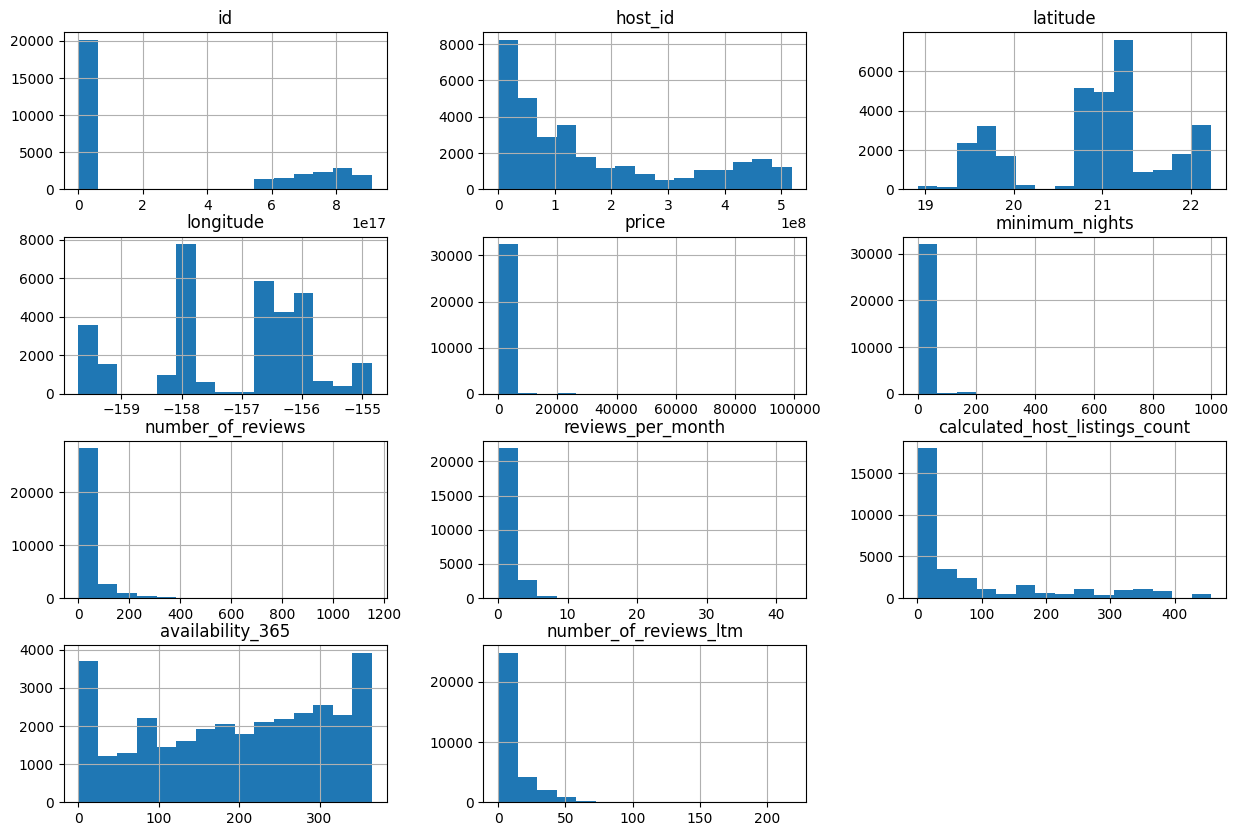

In [29]:
df.hist(bins=15, figsize=(15,10));

¿Hay valores atípicos?
Al distribuir el histograma, es posible comprobar si hay indicios de la presencia de valores atípicos. Tomemos, por ejemplo, las variables price, minimum_nigths y calculated_host_listings_count calculado.

Los valores no siguen una distribución y distorsionan toda la representación gráfica. Para confirmarlo, hay dos formas sencillas de ayudar a detectar valores atípicos. Son:

*   Resumen estadístico mediante el método description()
*   Trazar boxplots para una variable.


In [30]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,32597.000000,32597.000000,32597.000000,24919.000000,32597.000000,32597.000000
mean,475.113507,7.653250,33.309446,1.241528,82.009725,195.270577
std,1400.798440,23.108627,63.169093,1.393441,118.840762,115.584092
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,163.000000,1.000000,1.000000,0.270000,2.000000,91.000000
50%,259.000000,2.000000,8.000000,0.760000,20.000000,206.000000
75%,440.000000,5.000000,37.000000,1.800000,110.000000,297.000000
max,99110.000000,1000.000000,1154.000000,42.220000,457.000000,365.000000


Echando un vistazo al resumen estadístico anterior, podemos confirmar algunas hipótesis como:

La variable price tiene un 75% del valor de los datos por debajo de 440, pero su valor máximo es 99110.
La variable minimum_nigths tiene un 75% del valor de los datos por debajo de 5, pero su valor máximo es 1000.

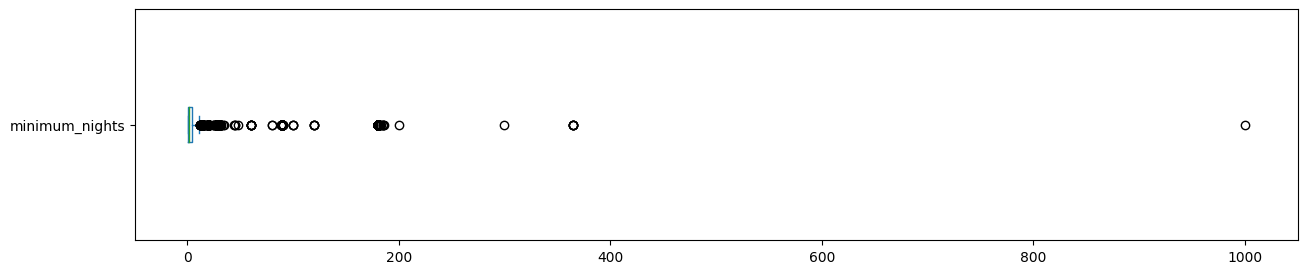

minimum_nights: values over 30:
659 entries
2.0217%


In [35]:

# Boxplot para la variable minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Muestra un valor mayor de 30 dias para la variable minimum_nights
print("minimum_nights: values over 30:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

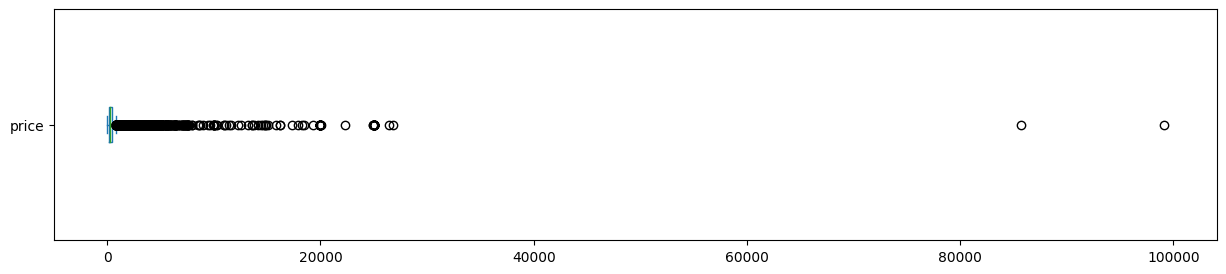


price: values over 1500
1179 entries
3.6169%


In [36]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# number of values over 1500 for price
print("\nprice: values over 1500")
print("{} entries".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Histograma sin valores atípicos
Como hemos identificado valores atípicos en las variables price y minimum_nigths, vamos a limpiar su DataFrame y a trazar un nuevo histograma.

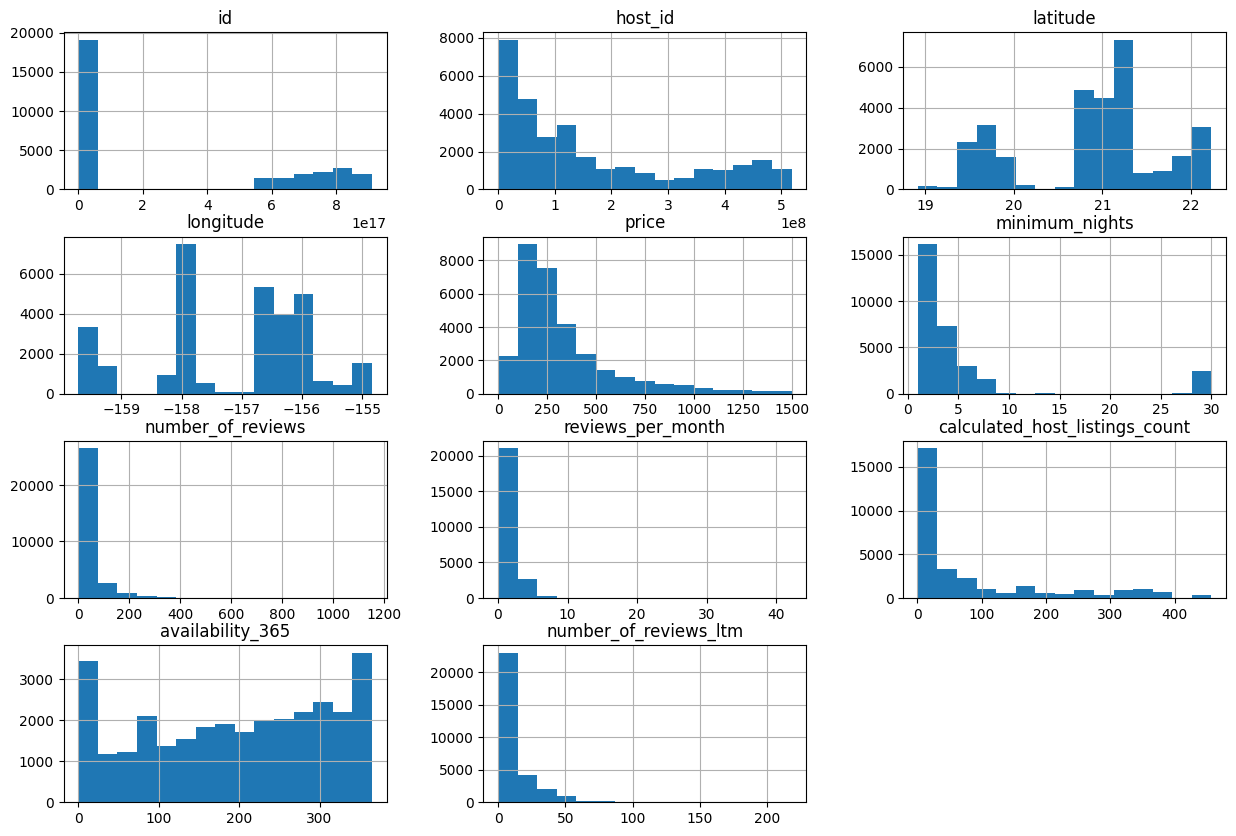

In [37]:
# Limpieza de valores atipicos para obtener un nuevo DataFrame (df)
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plot  histogram for numerical variables
df_clean.hist(bins=15, figsize=(15,10));

¿Cuál es la correlación entre las variables?

Correlación significa que existe una relación entre dos cosas. En nuestro contexto, buscamos una relación o similitud entre dos variables.

Esta relación puede medirse, y es función del coeficiente de correlación establecer su intensidad. Para identificar las correlaciones entre las variables de interés, voy a:

Crear una matriz de correlaciones
Generar un mapa de calor a partir de esta matriz, utilizando la librería seaborn

In [38]:
# Genera una matriz de correlación con las variables seleccionadas
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.092107,-0.212397,-0.245860,0.191648,-0.021065
minimum_nights,-0.092107,1.000000,-0.071841,-0.192592,-0.153141,0.004575
number_of_reviews,-0.212397,-0.071841,1.000000,0.611111,-0.252416,0.026291
reviews_per_month,-0.245860,-0.192592,0.611111,1.000000,-0.283349,0.017571
calculated_host_listings_count,0.191648,-0.153141,-0.252416,-0.283349,1.000000,0.105985
availability_365,-0.021065,0.004575,0.026291,0.017571,0.105985,1.000000


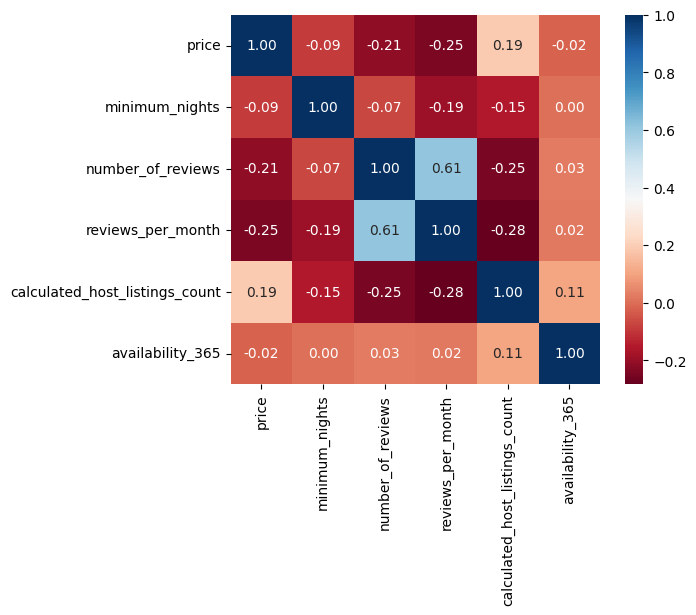

In [39]:

# Genera un mapa de calor
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

¿Qué tipo de propiedad se alquila más en Airbnb?

La columna variable room_type indica el tipo de alquiler que se anuncia en Airbnb. Si ya ha alquilado en el sitio web, sabrá que hay opciones de apartamentos/casas enteras, sólo alquilar una habitación o incluso compartir una habitación con otras personas.

Vamos a contar el número de apariciones de cada tipo de alquiler, utilizando el método value_counts ().

In [40]:
# Muestra la cantidad por tipo de alojamiento y su disponibilidad
df_clean.room_type.value_counts()

Entire home/apt    27478
Private room        3184
Hotel room            68
Shared room           45
Name: room_type, dtype: int64

In [41]:
# Muestra el porcentaje por tipo de alojamiento y su disponibilidad
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.892868
Private room       0.103461
Hotel room         0.002210
Shared room        0.001462
Name: room_type, dtype: float64

In [42]:
# Describe los precios agrupando por localidades
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Ewa                535.265677
Koloa-Poipu        483.930985
Lahaina            472.215573
Wailuku-Kahului    447.870968
South Kohala       417.793716
Koolauloa          405.400749
Waimea-Kekaha      387.450000
East Honolulu      374.473373
Hana               367.208333
Lihue              359.754919
Name: price, dtype: float64

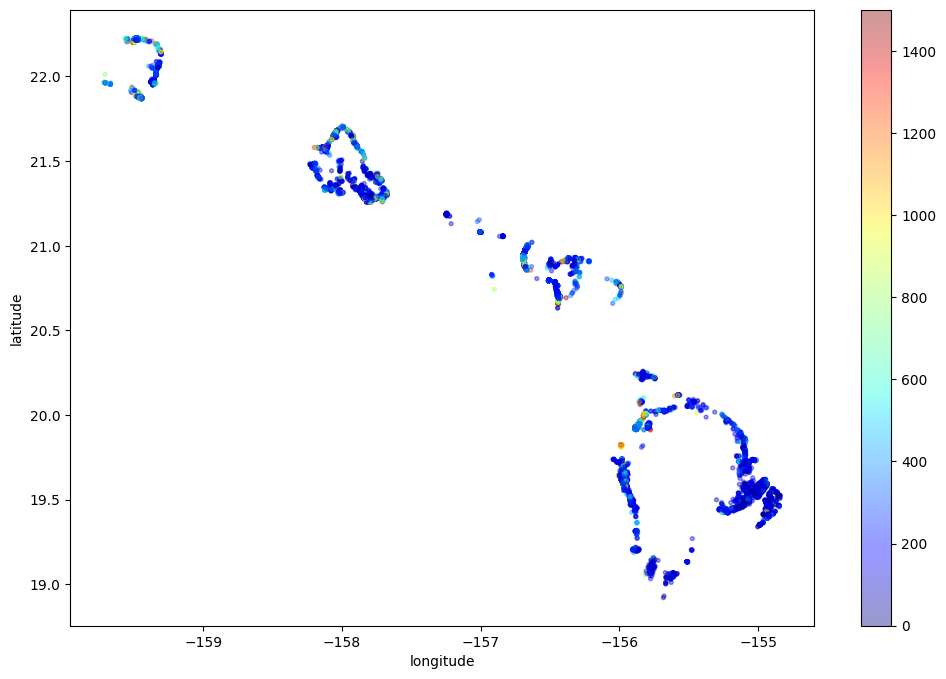

In [43]:
# Muestra geograficamente la localización de las concentraciones de alojamiento
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));